In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/MLD&SWT/MLD&SWT_baseline_7.0_cropped.nc')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/MLD&SWT/MLD&SWT_OAE_7.0_cropped.nc')

### EU Seasonal Average of MLD

In [7]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [8]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [9]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [10]:
data_baseline_plot = data_baseline.somxl010.mean(dim=('y', 'x'))
data_oae_plot = data_oae.somxl010.mean(dim=('y', 'x'))

In [11]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

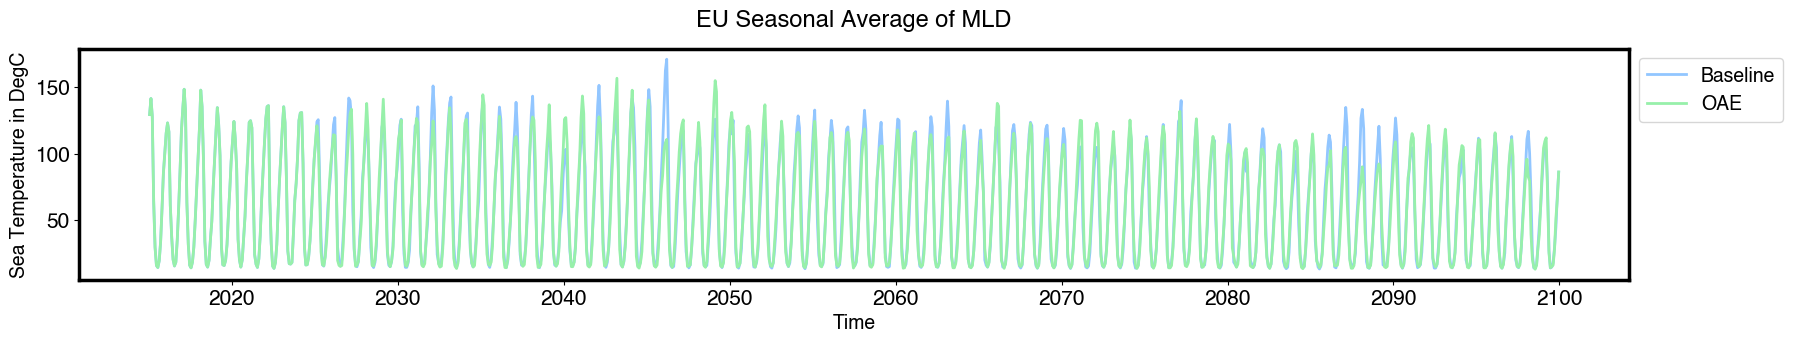

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.somxl010, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.somxl010, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Sea Temperature in DegC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of MLD', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [13]:
sliced_frame_baseline_plot = sliced_frame_baseline.somxl010.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.somxl010.mean(dim=('y', 'x'))

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

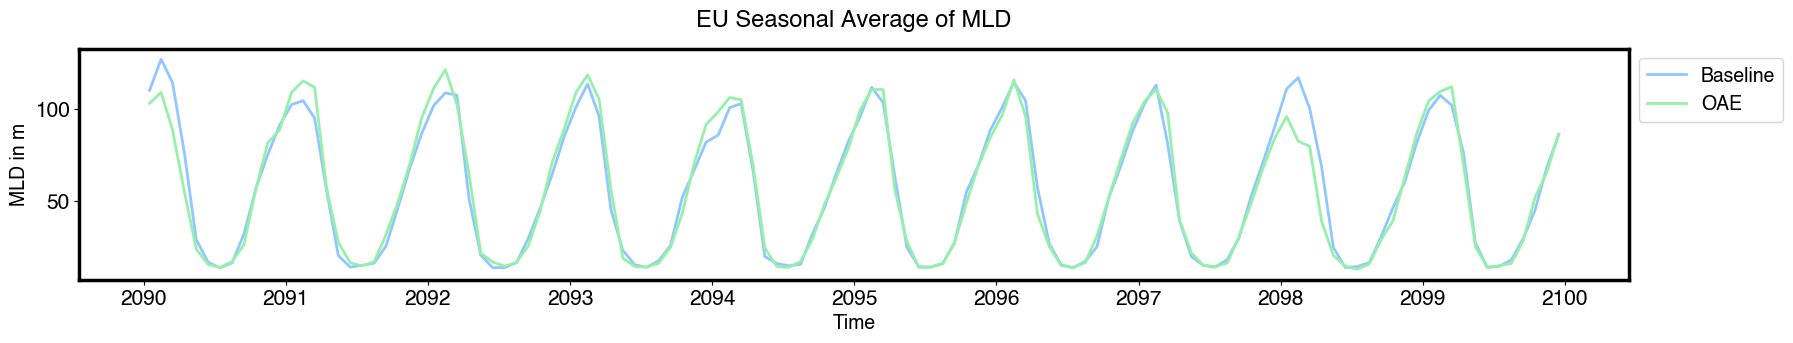

In [15]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.somxl010, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.somxl010, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of MLD', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of MLD

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

mld_baseline = data_baseline["somxl010"].sel(time_counter=slice(start_date, end_date))

In [17]:
mld_season_summary_baseline = mld_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_season_mean_all_years_baseline = mld_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
mld_seasonal_mean_baseline = mld_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [18]:
start_date = "2090-01-01"
end_date = "2100-01-01"

mld_oae = data_oae["somxl010"].sel(time_counter=slice(start_date, end_date))

In [19]:
mld_season_summary_oae = mld_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_season_mean_all_years_oae = mld_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
mld_seasonal_mean_oae = mld_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

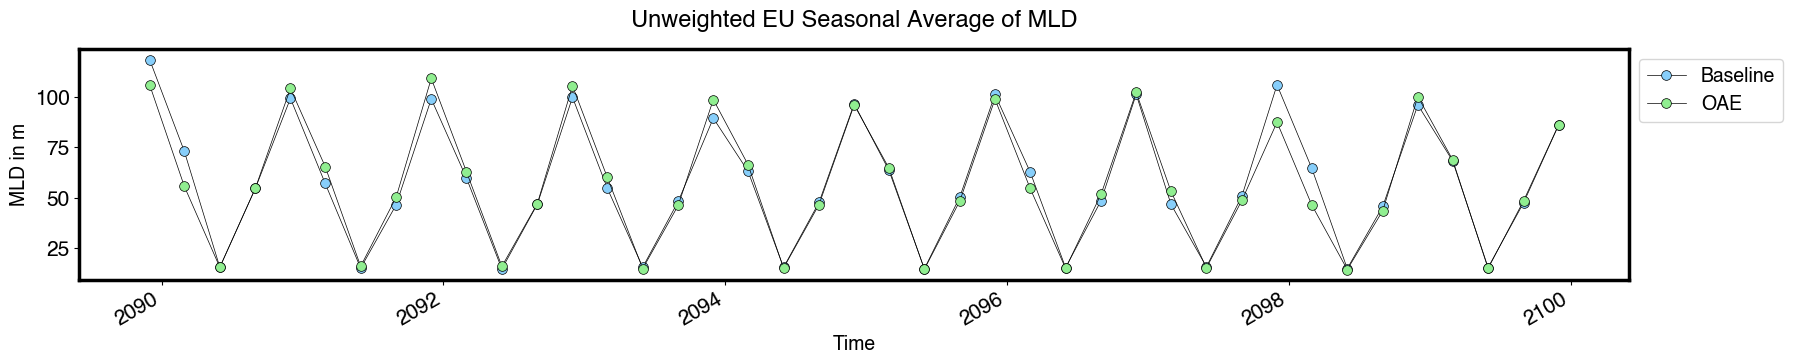

In [20]:
f, ax = plt.subplots(figsize=(20, 3))

mld_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of MLD", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of MLD

In [21]:
month_length_baseline = mld_baseline.time_counter.dt.days_in_month
mld_weighted_mean_baseline = ((mld_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
mld_weighted_mean_baseline = mld_weighted_mean_baseline.where(mld_weighted_mean_baseline)
mld_weighted_season_baseline = mld_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [22]:
month_length_oae = mld_oae.time_counter.dt.days_in_month
mld_weighted_mean_oae = ((mld_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
mld_weighted_mean_oae = mld_weighted_mean_oae.where(mld_weighted_mean_oae)
mld_weighted_season_oae = mld_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

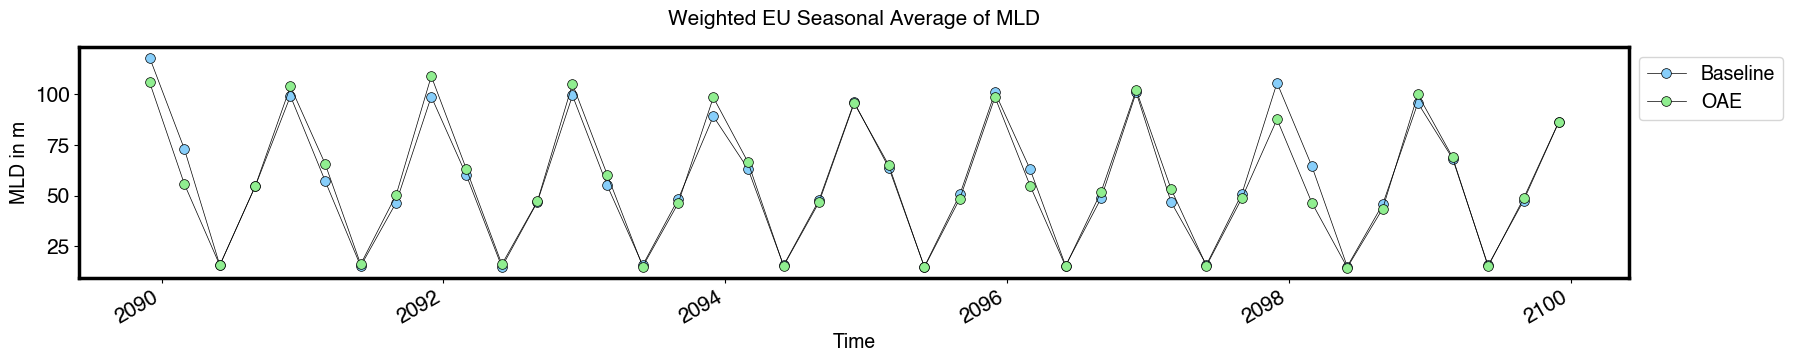

In [23]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
mld_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of MLD", fontsize=15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of MLD (seasons displayed)

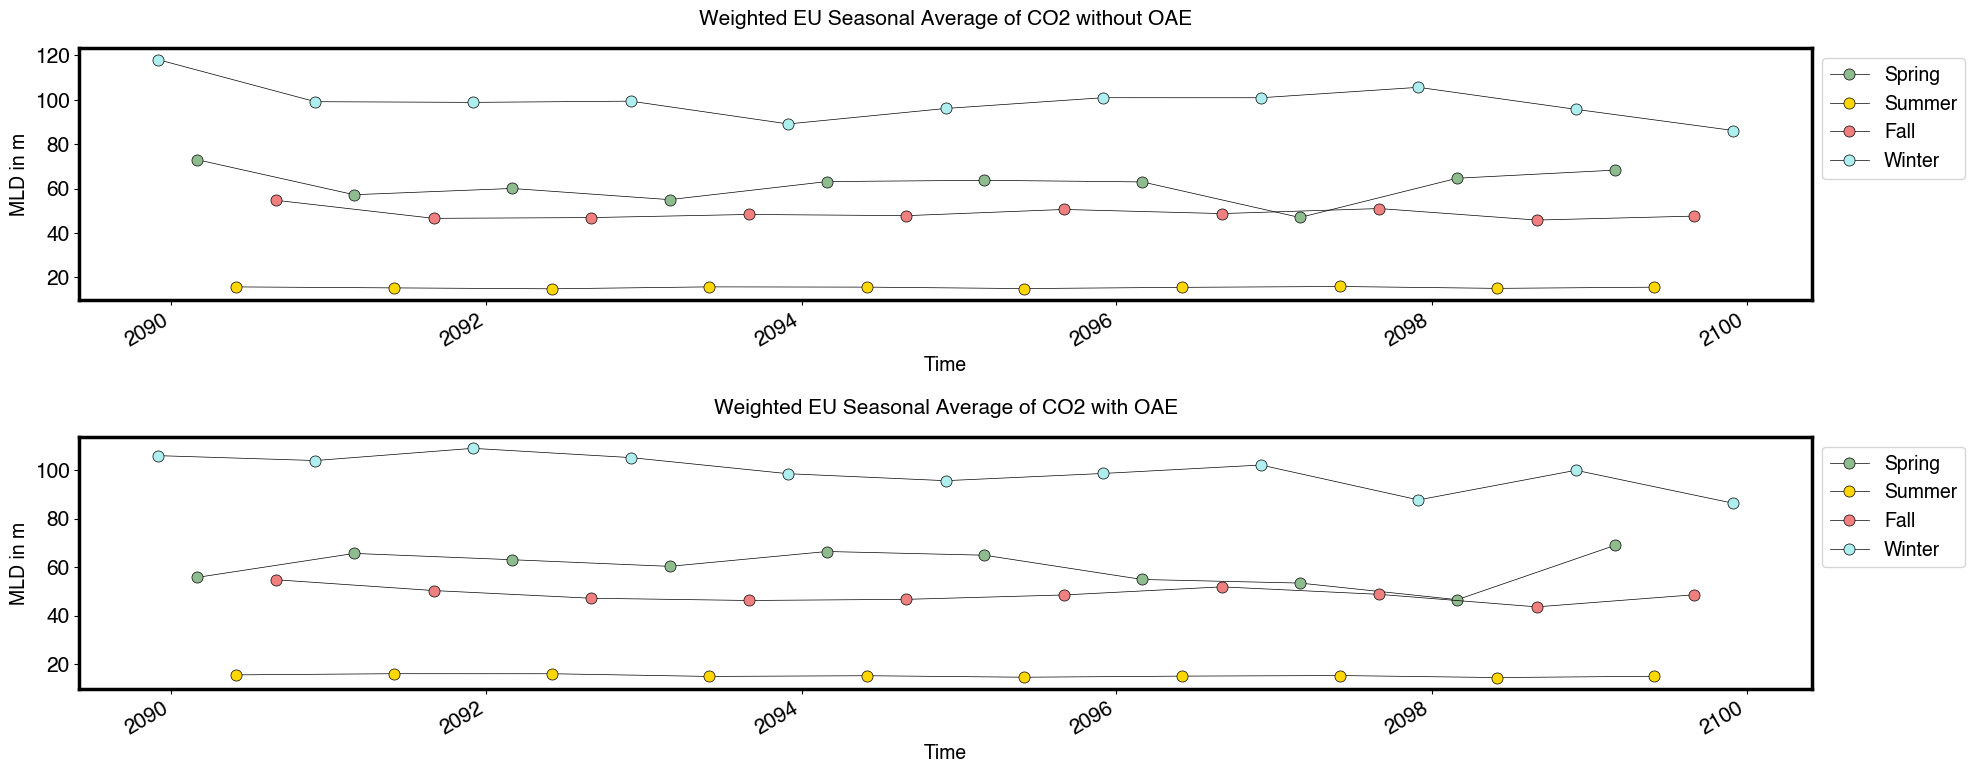

In [24]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in mld_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('MLD in m', fontsize=14)

for month, arr in mld_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('MLD in m', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of MLD without OAE (seasons displayed)

In [25]:
mld_weighted_baseline = mld_weighted_season_baseline.to_dataframe('somxl010')
mld_weighted_baseline['Month'] = pd.DatetimeIndex(mld_weighted_baseline.index).month

In [26]:
conditions = [
    (mld_weighted_baseline['Month'] == 3),
    (mld_weighted_baseline['Month'] == 6),
    (mld_weighted_baseline['Month'] == 9),
    (mld_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

mld_weighted_baseline['Month'] = np.select(conditions, values)

In [27]:
colors = dict(zip(mld_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

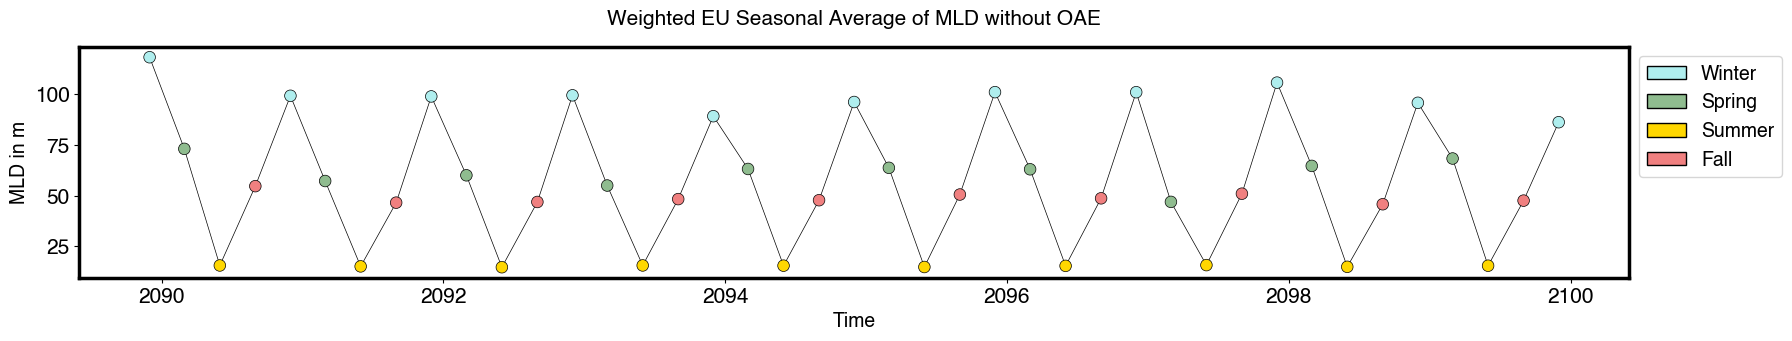

In [28]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_weighted_baseline.index, mld_weighted_baseline.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_baseline.index, mld_weighted_baseline.somxl010, color=mld_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD without OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of MLD with OAE (seasons displayed)

In [29]:
mld_weighted_oae = mld_weighted_season_oae.to_dataframe('somxl010')
mld_weighted_oae['Month'] = pd.DatetimeIndex(mld_weighted_oae.index).month

In [30]:
conditions = [
    (mld_weighted_oae['Month'] == 3),
    (mld_weighted_oae['Month'] == 6),
    (mld_weighted_oae['Month'] == 9),
    (mld_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

mld_weighted_oae['Month'] = np.select(conditions, values)

In [31]:
colors = dict(zip(mld_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

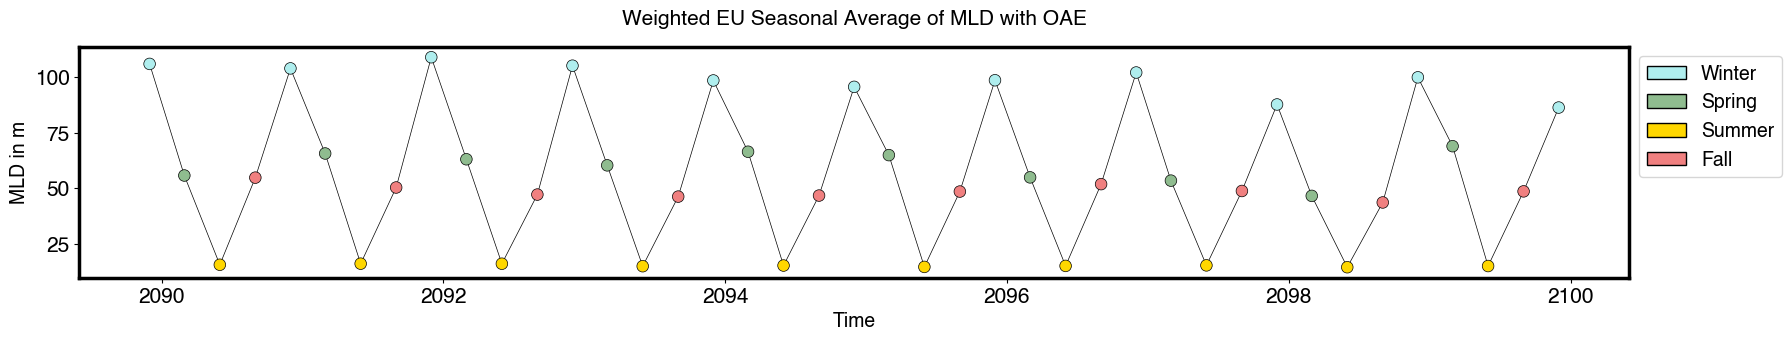

In [32]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_weighted_oae.index, mld_weighted_oae.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_oae.index, mld_weighted_oae.somxl010, color=mld_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD with OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of MLD (seasons displayed)

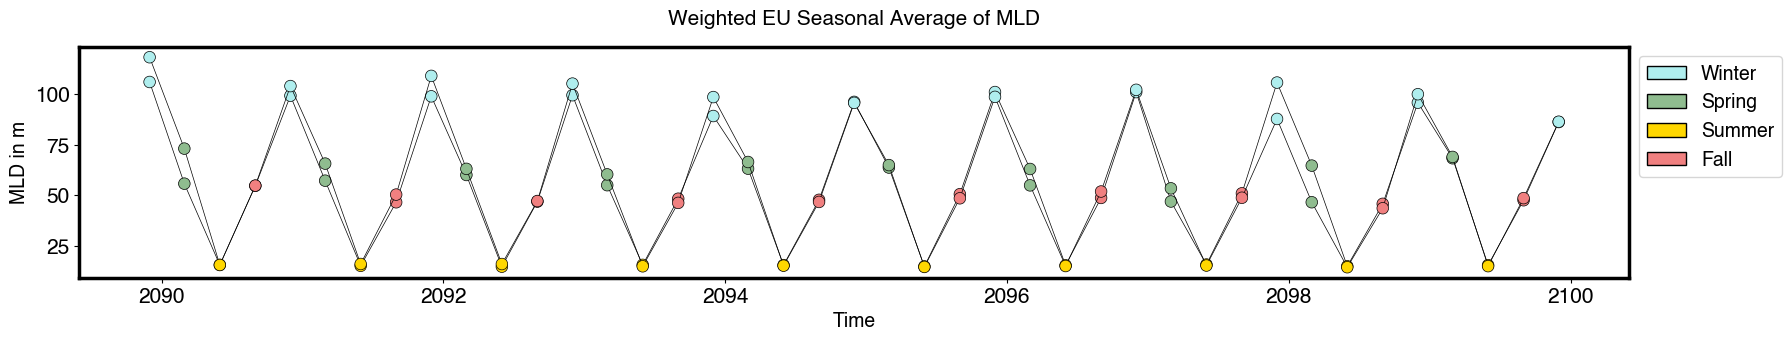

In [33]:
colors = dict(zip(mld_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(mld_weighted_baseline.index, mld_weighted_baseline.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_baseline.index, mld_weighted_baseline.somxl010, color=mld_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(mld_weighted_oae.index, mld_weighted_oae.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_weighted_oae.index, mld_weighted_oae.somxl010, color=mld_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD", fontsize=15, y=1.06)

pass

### EU Monthly Averaged somxl010 for the last 10 years

In [34]:
mean_baseline = (sliced_frame_baseline.somxl010.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).somxl010.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [35]:
mean_oae = (sliced_frame_oae.somxl010.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).somxl010.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

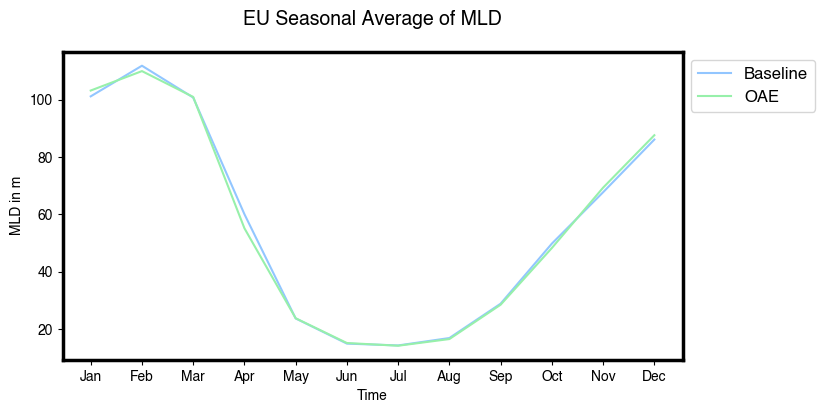

In [36]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.somxl010, label='Baseline')
plt.plot(mean_oae.somxl010, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("MLD in m", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of MLD', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### EU Seasonal Average of MLD from 2090 to 2100 without OAE

In [37]:
month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [38]:
weights_baseline = weights_baseline.to_dataset()

In [39]:
ds_weighted_baseline = (sliced_frame_baseline.somxl010 * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='somxl010')
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

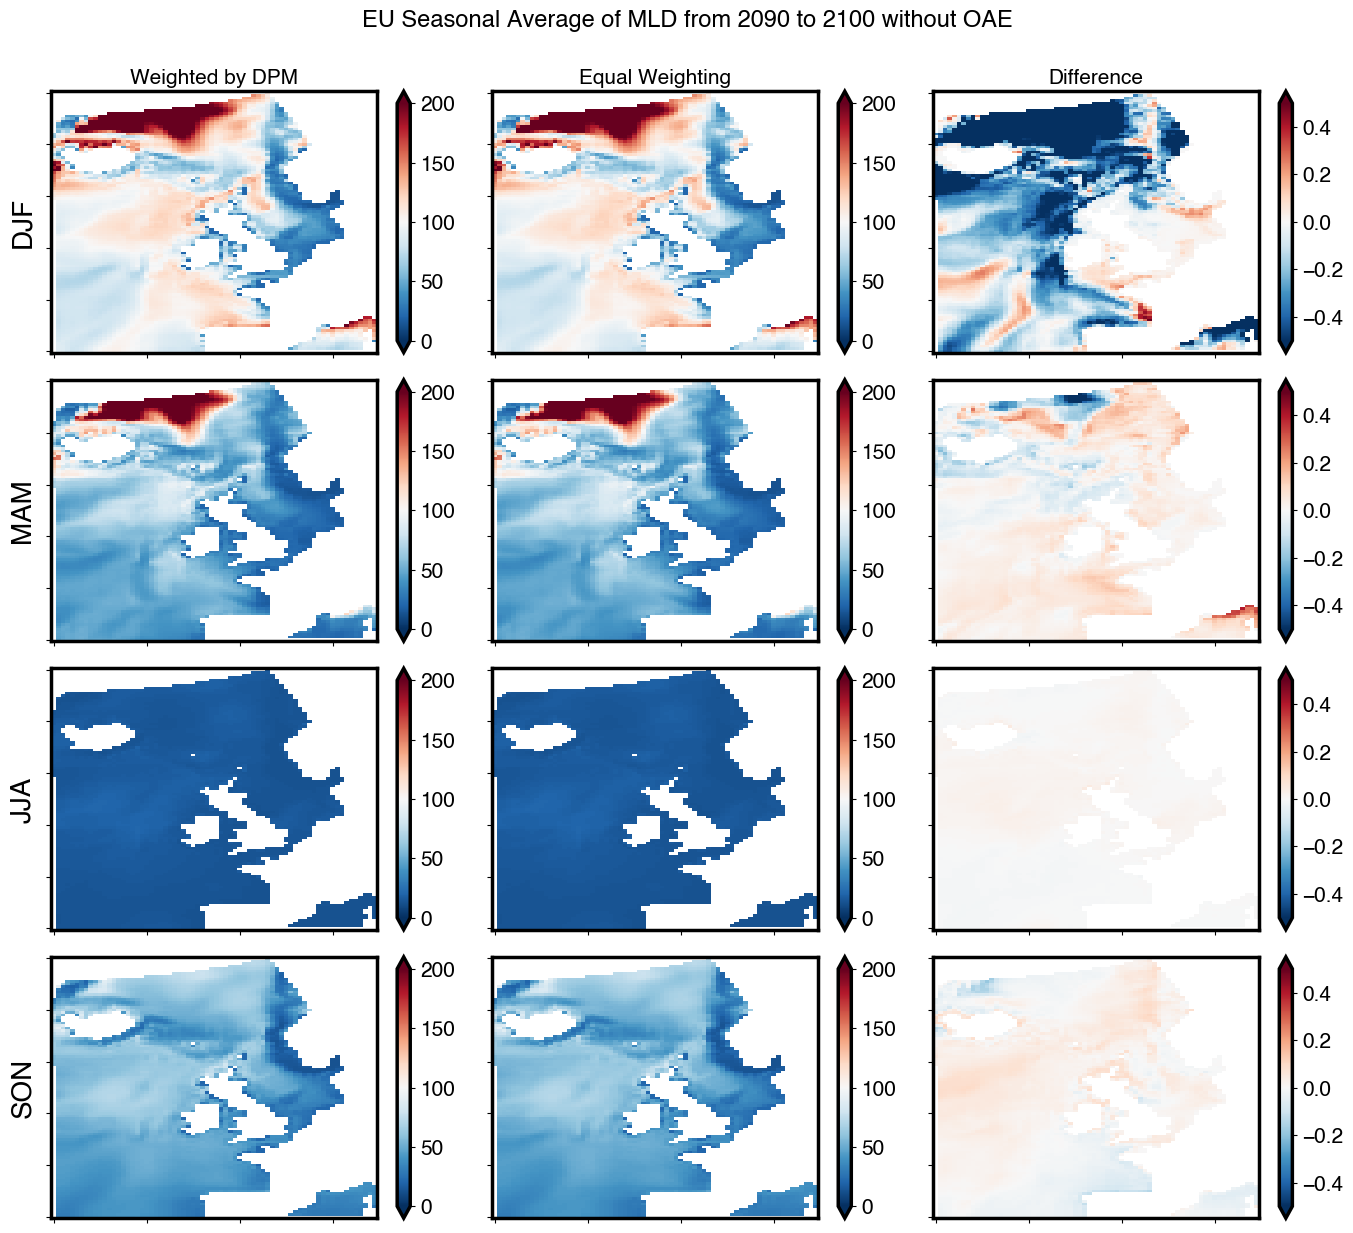

In [40]:
notnull = pd.notnull(ds_unweighted_baseline["somxl010"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["somxl010"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=0,
        vmax=200,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["somxl010"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=0,
        vmax=200,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["somxl010"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of MLD from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of MLD from 2090 to 2100 with OAE

In [41]:
month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [42]:
weights_oae = weights_oae.to_dataset()

In [43]:
ds_weighted_oae = (sliced_frame_oae.somxl010 * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='somxl010')
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

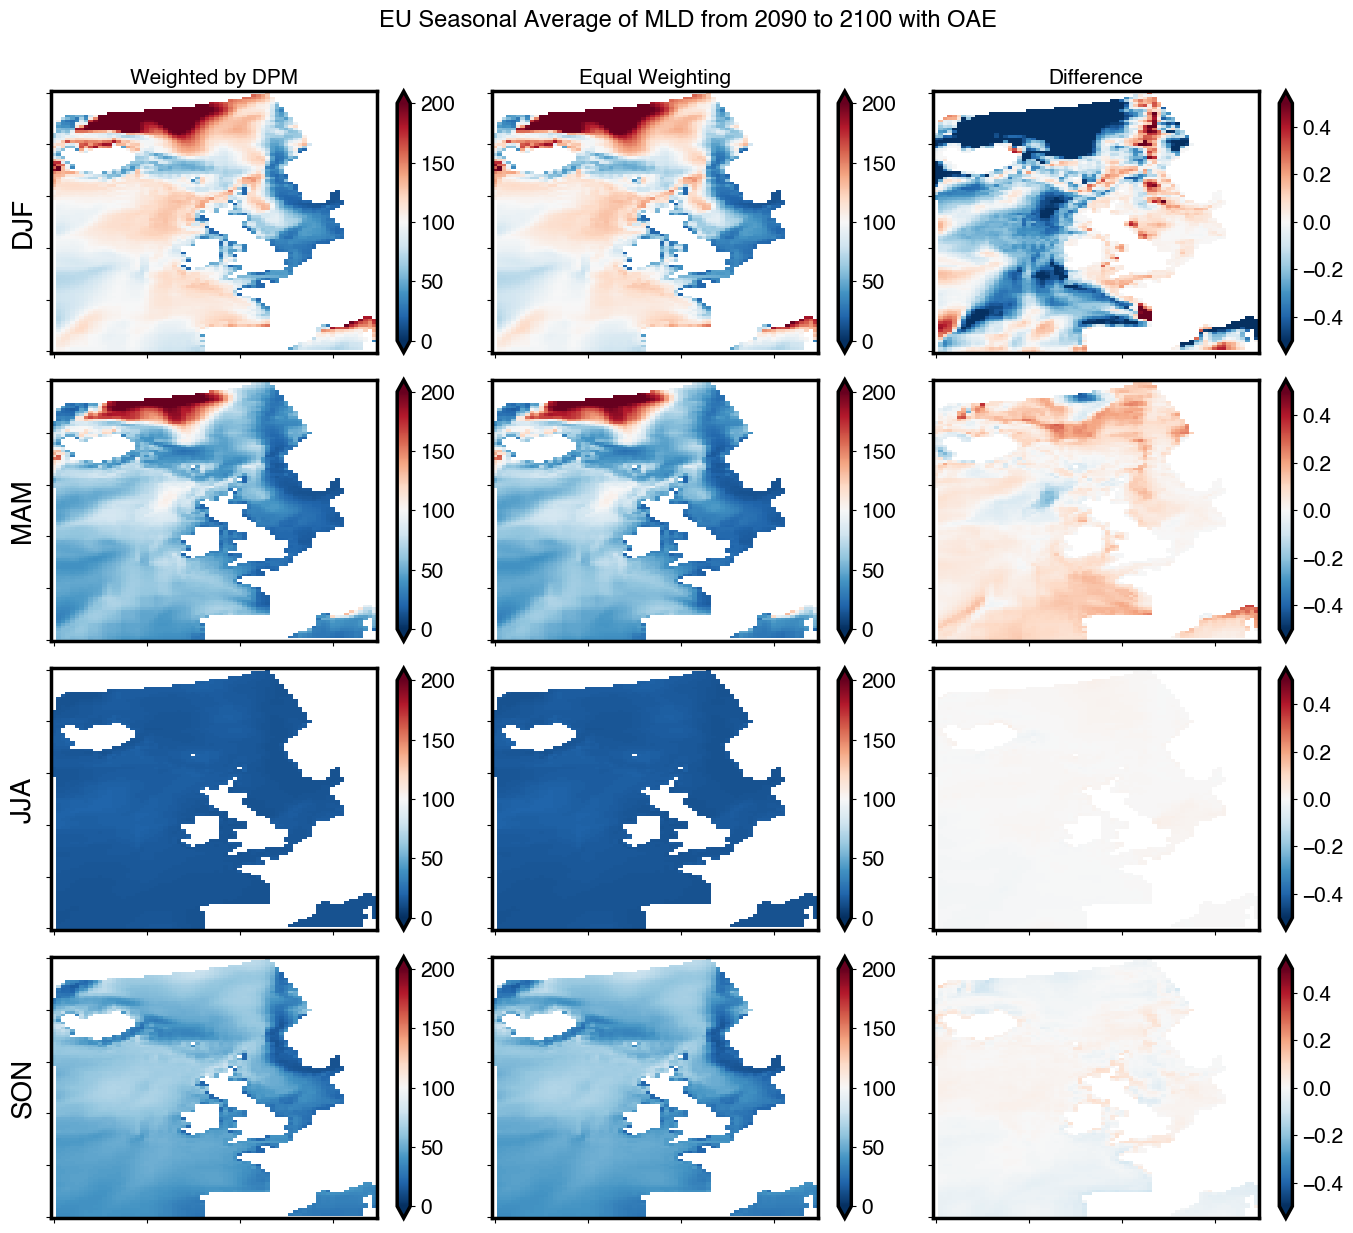

In [44]:
notnull = pd.notnull(ds_unweighted_baseline["somxl010"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["somxl010"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=0,
        vmax=200,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["somxl010"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=0,
        vmax=200,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["somxl010"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of MLD from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of MLD from 2090 to 2100 without OAE

In [45]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

mld_baseline_month = data_baseline["somxl010"].sel(time_counter=slice(start_date_month, end_date_month))

In [46]:
mld_month_summary_baseline = mld_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_month_mean_all_years_baseline = mld_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
mld_monthly_mean_baseline = mld_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [47]:
mld_oae_month = data_oae["somxl010"].sel(time_counter=slice(start_date_month, end_date_month))

In [48]:
mld_month_summary_oae = mld_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
mld_month_mean_all_years_oae = mld_oae_month.resample(time_counter='M').mean(keep_attrs=True)
mld_monthly_mean_oae = mld_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

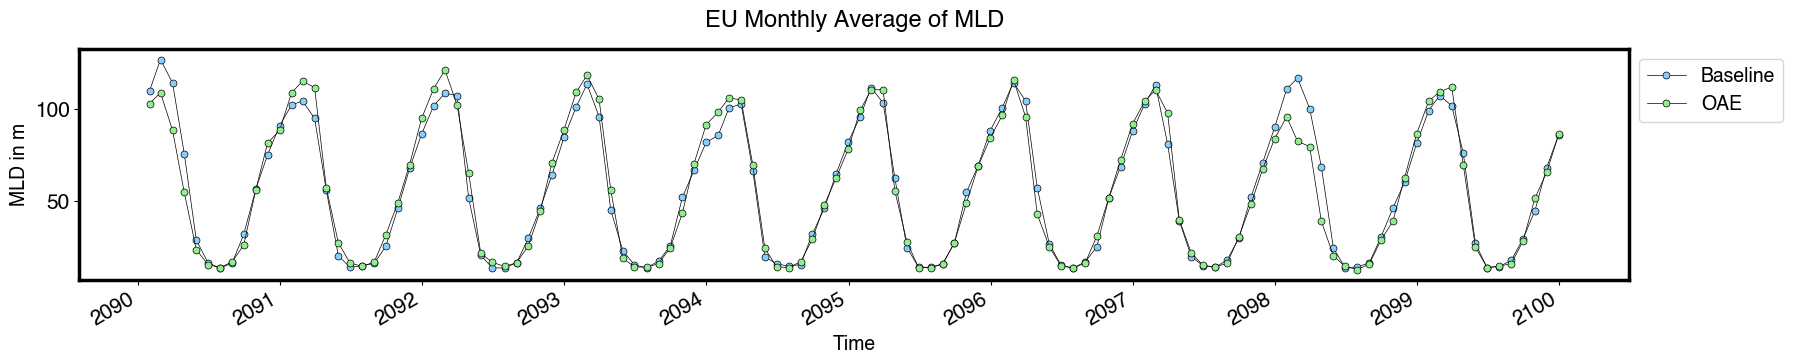

In [49]:
f, ax = plt.subplots(figsize=(20, 3))

mld_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

mld_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of MLD", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD in m", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of MLD from 2090 to 2100 without OAE

In [50]:
mld_baseline_monthly = mld_monthly_mean_baseline.to_dataframe('somxl010')
mld_baseline_monthly['Month'] = pd.DatetimeIndex(mld_baseline_monthly.index).month

In [51]:
conditions = [
    (mld_baseline_monthly['Month'] == 1),
    (mld_baseline_monthly['Month'] == 2),
    (mld_baseline_monthly['Month'] == 3),
    (mld_baseline_monthly['Month'] == 4),
    (mld_baseline_monthly['Month'] == 5),
    (mld_baseline_monthly['Month'] == 6),
    (mld_baseline_monthly['Month'] == 7),
    (mld_baseline_monthly['Month'] == 8),
    (mld_baseline_monthly['Month'] == 9),
    (mld_baseline_monthly['Month'] == 10),
    (mld_baseline_monthly['Month'] == 11),
    (mld_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

mld_baseline_monthly['Month'] = np.select(conditions, values)

In [52]:
colors = dict(zip(mld_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

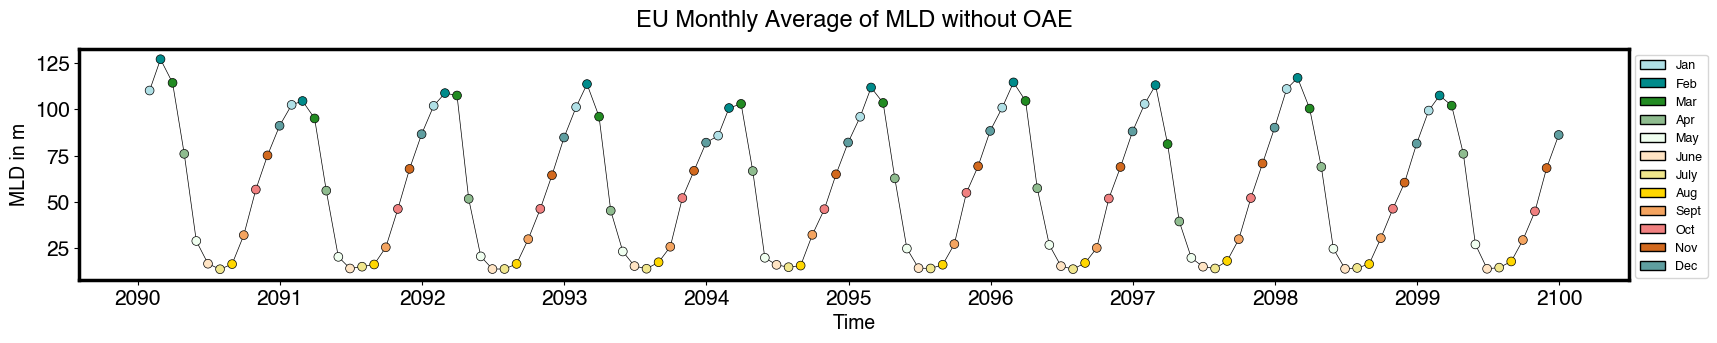

In [53]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, color=mld_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("EU Monthly Average of MLD without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of MLD from 2090 to 2100 with OAE

In [54]:
mld_oae_monthly = mld_monthly_mean_oae.to_dataframe('somxl010')
mld_oae_monthly['Month'] = pd.DatetimeIndex(mld_oae_monthly.index).month

In [55]:
conditions = [
    (mld_oae_monthly['Month'] == 1),
    (mld_oae_monthly['Month'] == 2),
    (mld_oae_monthly['Month'] == 3),
    (mld_oae_monthly['Month'] == 4),
    (mld_oae_monthly['Month'] == 5),
    (mld_oae_monthly['Month'] == 6),
    (mld_oae_monthly['Month'] == 7),
    (mld_oae_monthly['Month'] == 8),
    (mld_oae_monthly['Month'] == 9),
    (mld_oae_monthly['Month'] == 10),
    (mld_oae_monthly['Month'] == 11),
    (mld_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

mld_oae_monthly['Month'] = np.select(conditions, values)

In [56]:
colors = dict(zip(mld_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

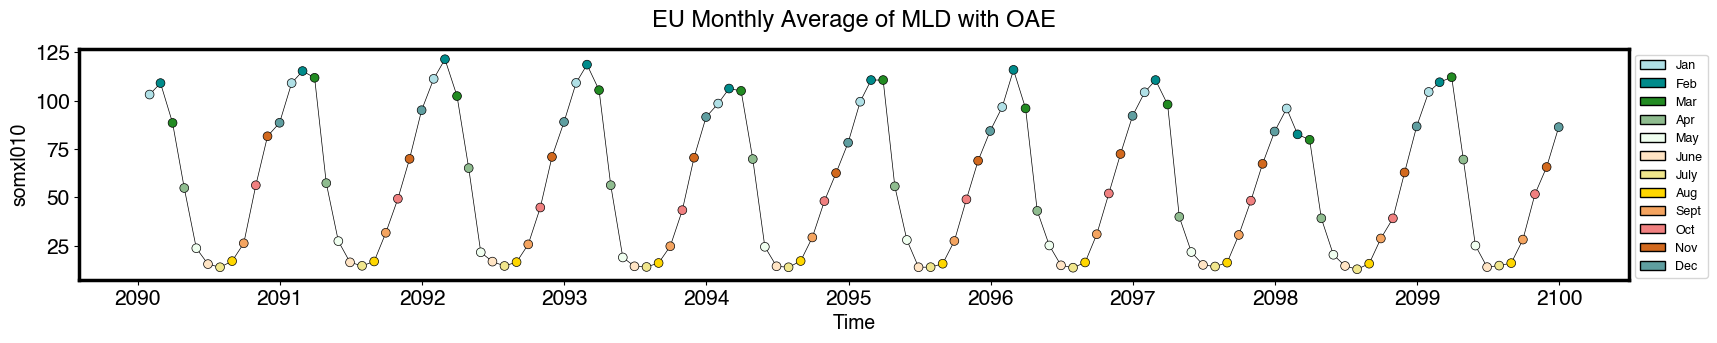

In [57]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(mld_oae_monthly.index, mld_oae_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_oae_monthly.index, mld_oae_monthly.somxl010, color=mld_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('somxl010', fontsize=14)
ax.set_title("EU Monthly Average of MLD with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of MLD from 2090 to 2100 with and without OAE

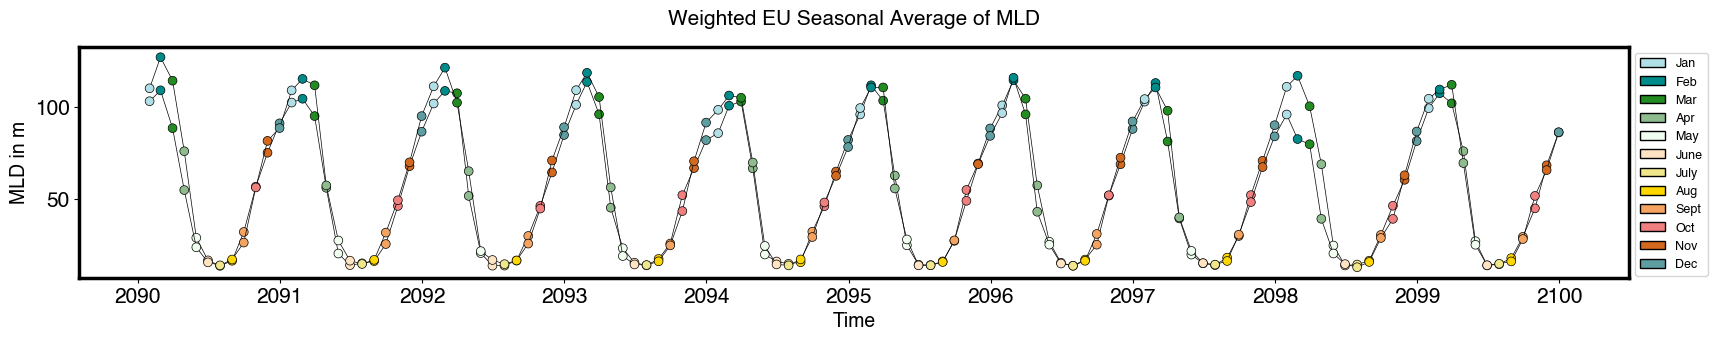

In [58]:
colors = dict(zip(mld_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_baseline_monthly.index, mld_baseline_monthly.somxl010, color=mld_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(mld_oae_monthly.index, mld_oae_monthly.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mld_oae_monthly.index, mld_oae_monthly.somxl010, color=mld_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('MLD in m', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of MLD", fontsize=15, y=1.06)

pass

### Δ somxl010 between Baseline and OAE from 2090 to 2100

In [59]:
delta_somxl010 = mld_oae_monthly.somxl010 - mld_baseline_monthly.somxl010

In [60]:
delta_somxl010 = delta_somxl010.to_xarray()

In [61]:
delta_somxl010 = delta_somxl010.to_dataframe('somxl010')
delta_somxl010['Month'] = pd.DatetimeIndex(delta_somxl010.index).month

In [62]:
conditions = [
    (delta_somxl010['Month'] == 1),
    (delta_somxl010['Month'] == 2),
    (delta_somxl010['Month'] == 3),
    (delta_somxl010['Month'] == 4),
    (delta_somxl010['Month'] == 5),
    (delta_somxl010['Month'] == 6),
    (delta_somxl010['Month'] == 7),
    (delta_somxl010['Month'] == 8),
    (delta_somxl010['Month'] == 9),
    (delta_somxl010['Month'] == 10),
    (delta_somxl010['Month'] == 11),
    (delta_somxl010['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_somxl010['Month'] = np.select(conditions, values)

In [63]:
colors = dict(zip(delta_somxl010.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

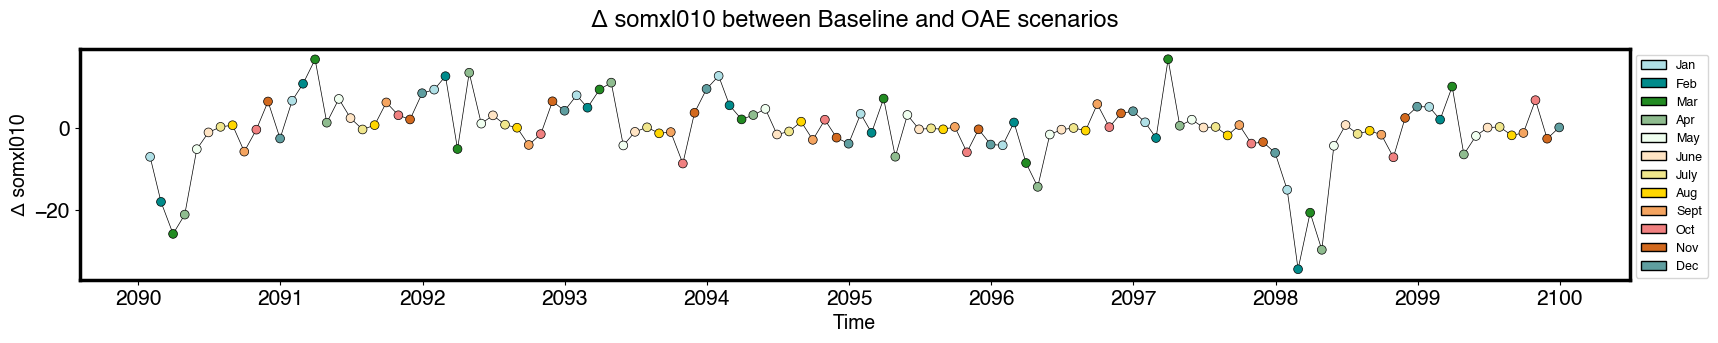

In [64]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_somxl010.index, delta_somxl010.somxl010, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_somxl010.index, delta_somxl010.somxl010, color=delta_somxl010.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ somxl010', fontsize=14)
ax.set_title("Δ somxl010 between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

pass

### MLD Annual Amplitude without OAE

In [65]:
data_baseline_minmax = data_baseline_plot.to_dataframe()
data_baseline_minmax = data_baseline_minmax.reset_index()

In [66]:
year_max_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['somxl010'].idxmax().values]

In [67]:
year_min_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['somxl010'].idxmin().values]

In [68]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [69]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [70]:
mld_amplitude_baseline = year_max_baseline['somxl010'] - year_min_baseline['somxl010']

In [71]:
mld_amplitude_baseline = mld_amplitude_baseline.to_xarray()

In [72]:
mld_amplitude_baseline = mld_amplitude_baseline.to_dataset()

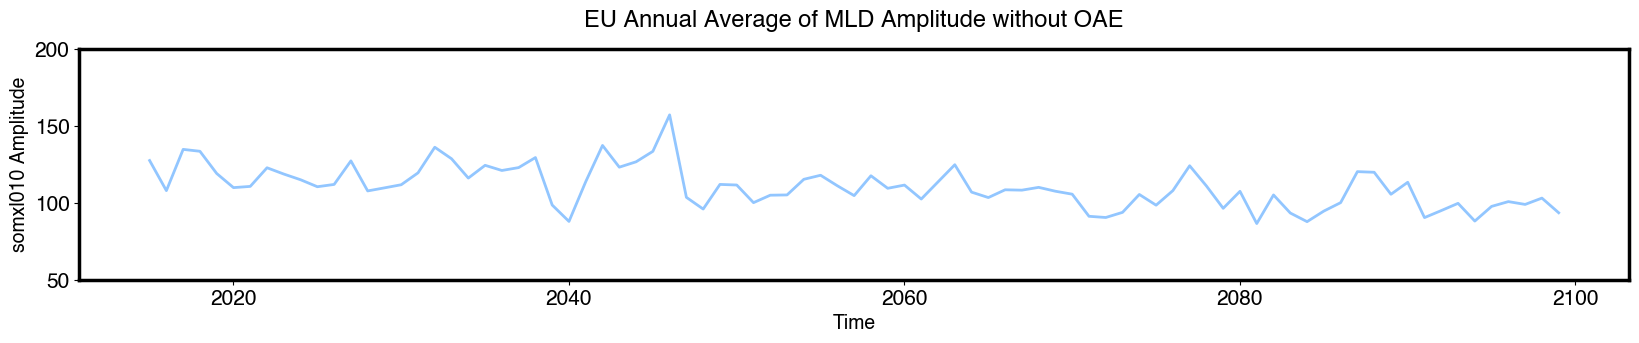

In [73]:
plt.figure(figsize=(20, 3))
plt.plot(mld_amplitude_baseline.year, mld_amplitude_baseline.somxl010, linewidth=2)
plt.ylim(50, 200)
plt.xlabel("Time", fontsize=14)
plt.ylabel("somxl010 Amplitude", fontsize=14)
plt.title('EU Annual Average of MLD Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### MLD Annual Amplitude with OAE

In [74]:
data_oae_minmax = data_oae_plot.to_dataframe()
data_oae_minmax = data_oae_minmax.reset_index()

In [75]:
year_max_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['somxl010'].idxmax().values]

In [76]:
year_min_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['somxl010'].idxmin().values]

In [77]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [78]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [79]:
mld_amplitude_oae = year_max_oae['somxl010'] - year_min_oae['somxl010']

In [80]:
mld_amplitude_oae = mld_amplitude_oae.to_xarray()

In [81]:
mld_amplitude_oae = mld_amplitude_oae.to_dataset()

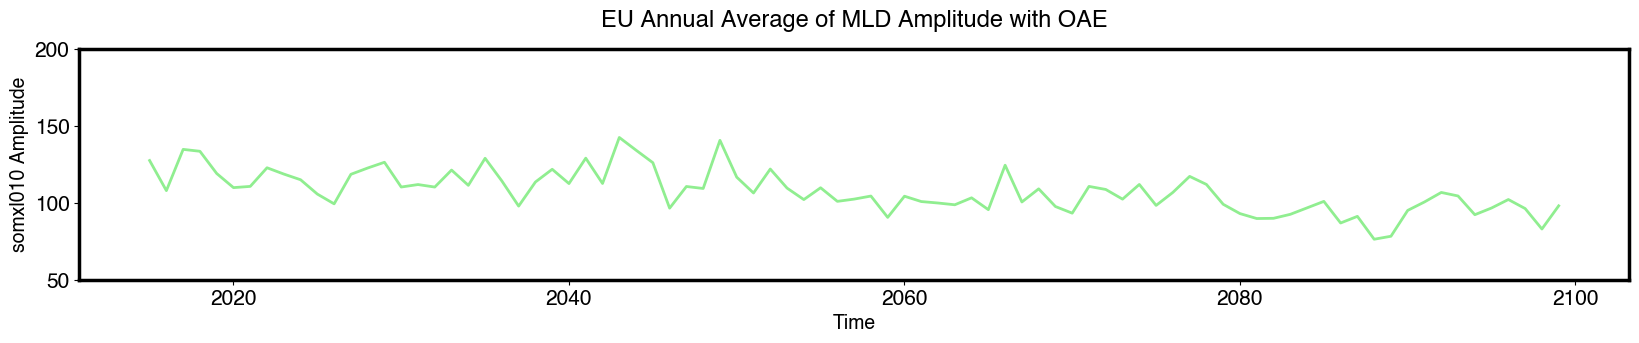

In [82]:
plt.figure(figsize=(20, 3))
plt.plot(mld_amplitude_oae.year, mld_amplitude_oae.somxl010, linewidth=2, color='lightgreen')
plt.ylim(50, 200)
plt.xlabel("Time", fontsize=14)
plt.ylabel("somxl010 Amplitude", fontsize=14)
plt.title('EU Annual Average of MLD Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### MLD Annual Amplitude with and without OAE

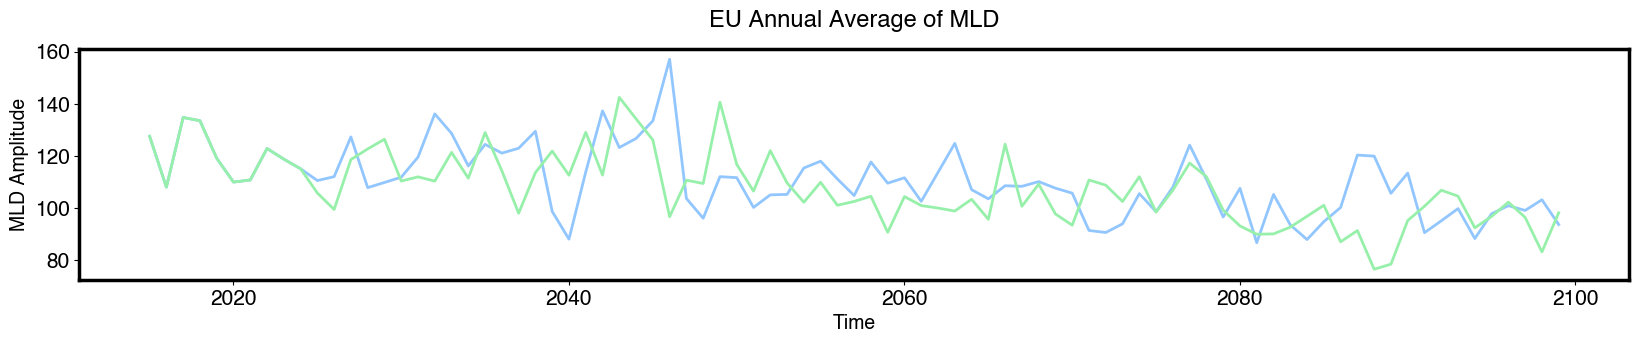

In [83]:
plt.figure(figsize=(20, 3))
plt.plot(mld_amplitude_baseline.year, mld_amplitude_baseline.somxl010, linewidth=2, label = 'Baseline')
plt.plot(mld_amplitude_oae.year, mld_amplitude_oae.somxl010, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("MLD Amplitude", fontsize=14)
plt.title('EU Annual Average of MLD', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()